In [ ]:
import pandas as pd
import statsmodels.api as sm

In [ ]:
con = pd.read_csv('midterm_tuberculosis.csv')
con.rename(columns={'15-19': 'age_15_19', '20-24': 'age_20_24', '25-28': 'age_25_28',
                   '29-34': 'age_29_34', '35-39': 'age_35_39', '40-44': 'age_40_44',
                   '45-49': 'age_45_49'}, inplace=True) #Fixing the column names using Panda’s rename() method

In [ ]:
X = con[['age_15_19', 'age_20_24', 'age_25_28', 'age_29_34', 'age_35_39', 'age_40_44', 'age_45_49']] #Selected columns
Y = con['Всего']
X = sm.add_constant(X)

In [ ]:
#Kitchen sink model for OLS Regression Results
ks = sm.OLS(Y, X)
ks_res =ks.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Всего   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1865.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           1.24e-35
Time:                        11:05:49   Log-Likelihood:                -186.43
No. Observations:                  36   AIC:                             388.9
Df Residuals:                      28   BIC:                             401.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.2066      9.121     -0.900      0.376     -26.889      10.476
age_15_19      2.6597      1.828      1.455      0.157      -1.084       6.403
age_20_24      1.5871      1.321      1.202      0.240      -1.119       4.293
age_25_28     -0.1496      1.798     -0.083      0.934      -3.832       3.532
age_29_34      3.2618      1.187      2.749      0.010       0.831       5.693
age_35_39     -0.7249      1.625     -0.446      0.659      -4.054       2.604
age_40_44     -0.6045      1.760     -0.343      0.734      -4.211       3.002
age_45_49      4.3405      1.355      3.203      0.003       1.564       7.117
==============================================================================
Omnibus:                       51.217   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.344
Skew:                          -3.099   Prob(JB):                     2.03e-69
Kurtosis:                      16.133   Cond. No.                         303.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Using R-like formulas
import statsmodels.formula.api as smf
ksf =  smf.ols(' Всего ~ age_15_19 + age_20_24 + age_25_28 + age_29_34 + age_35_39 + age_40_44 + age_45_49 ', data=con)
ksf_res = ksf.fit()
ksf_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Всего   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1865.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           1.24e-35
Time:                        11:05:49   Log-Likelihood:                -186.43
No. Observations:                  36   AIC:                             388.9
Df Residuals:                      28   BIC:                             401.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.2066      9.121     -0.900      0.376     -26.889      10.476
age_15_19      2.6597      1.828      1.455      0.157      -1.084       6.403
age_20_24      1.5871      1.321      1.202      0.240      -1.119       4.293
age_25_28     -0.1496      1.798     -0.083      0.934      -3.832       3.532
age_29_34      3.2618      1.187      2.749      0.010       0.831       5.693
age_35_39     -0.7249      1.625     -0.446      0.659      -4.054       2.604
age_40_44     -0.6045      1.760     -0.343      0.734      -4.211       3.002
age_45_49      4.3405      1.355      3.203      0.003       1.564       7.117
==============================================================================
Omnibus:                       51.217   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.344
Skew:                          -3.099   Prob(JB):                     2.03e-69
Kurtosis:                      16.133   Cond. No.                         303.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

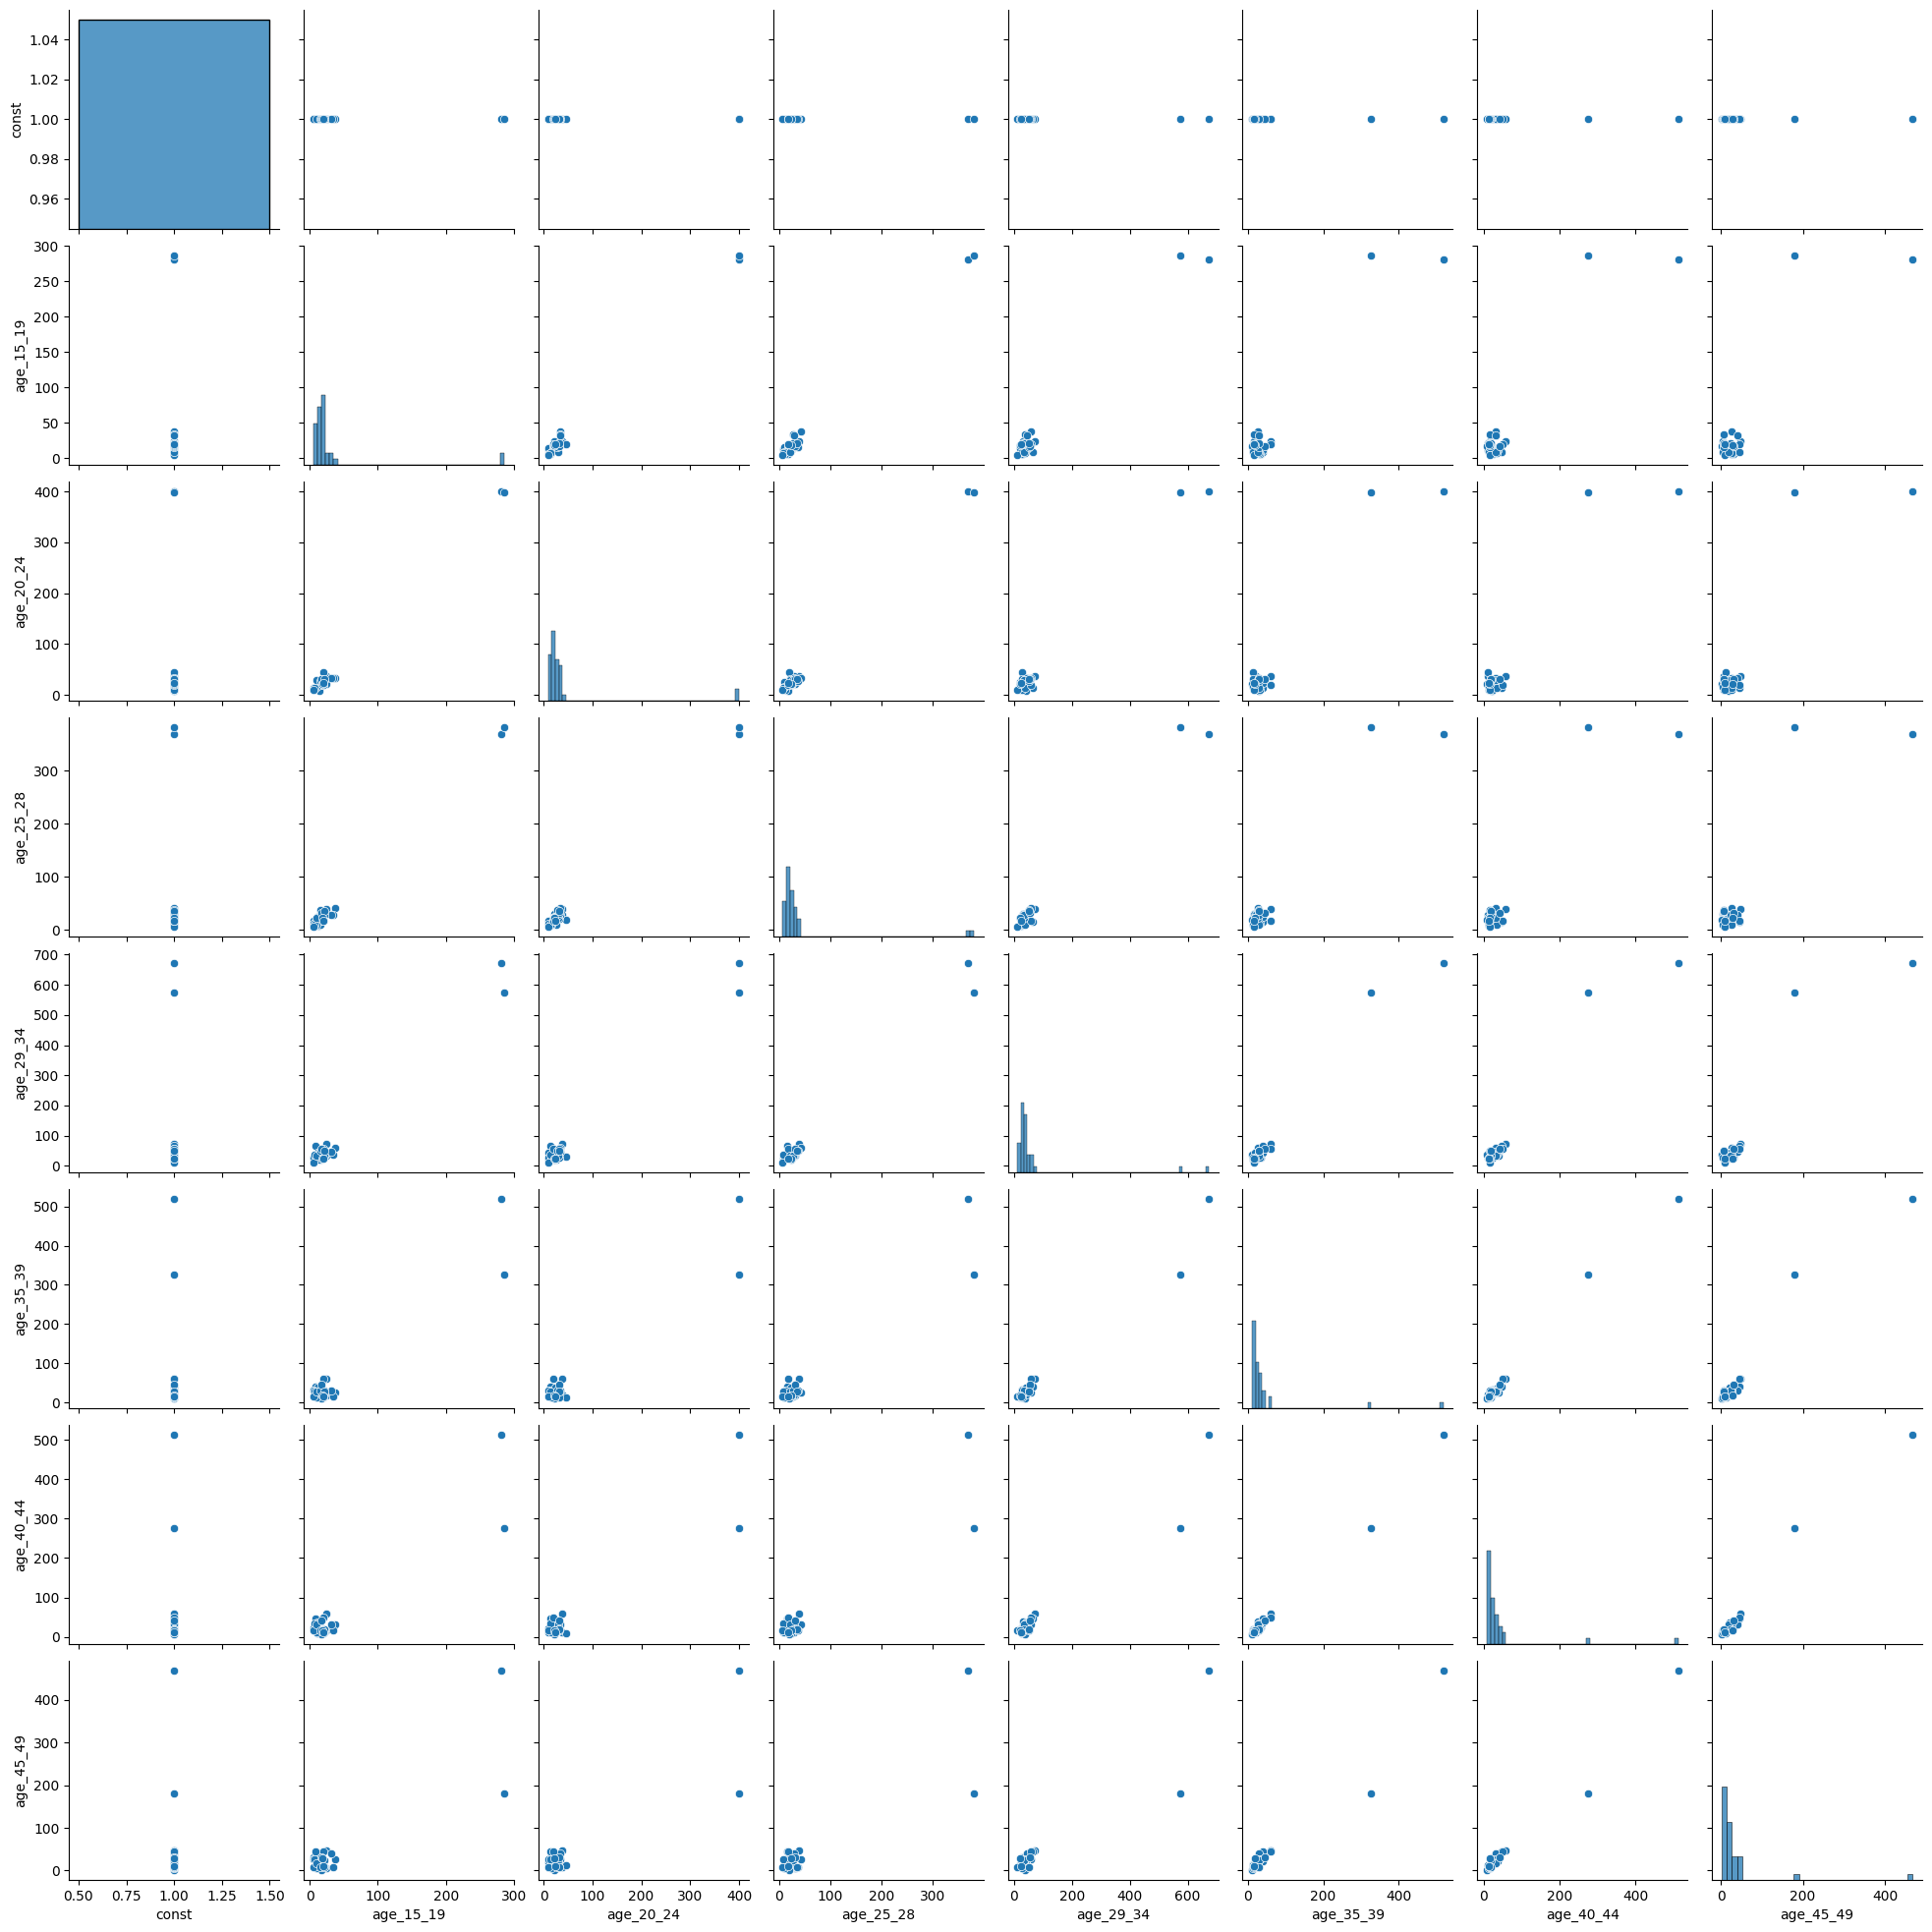

In [ ]:
#Scatterplot matrix
import seaborn as sns
sns.pairplot(X);

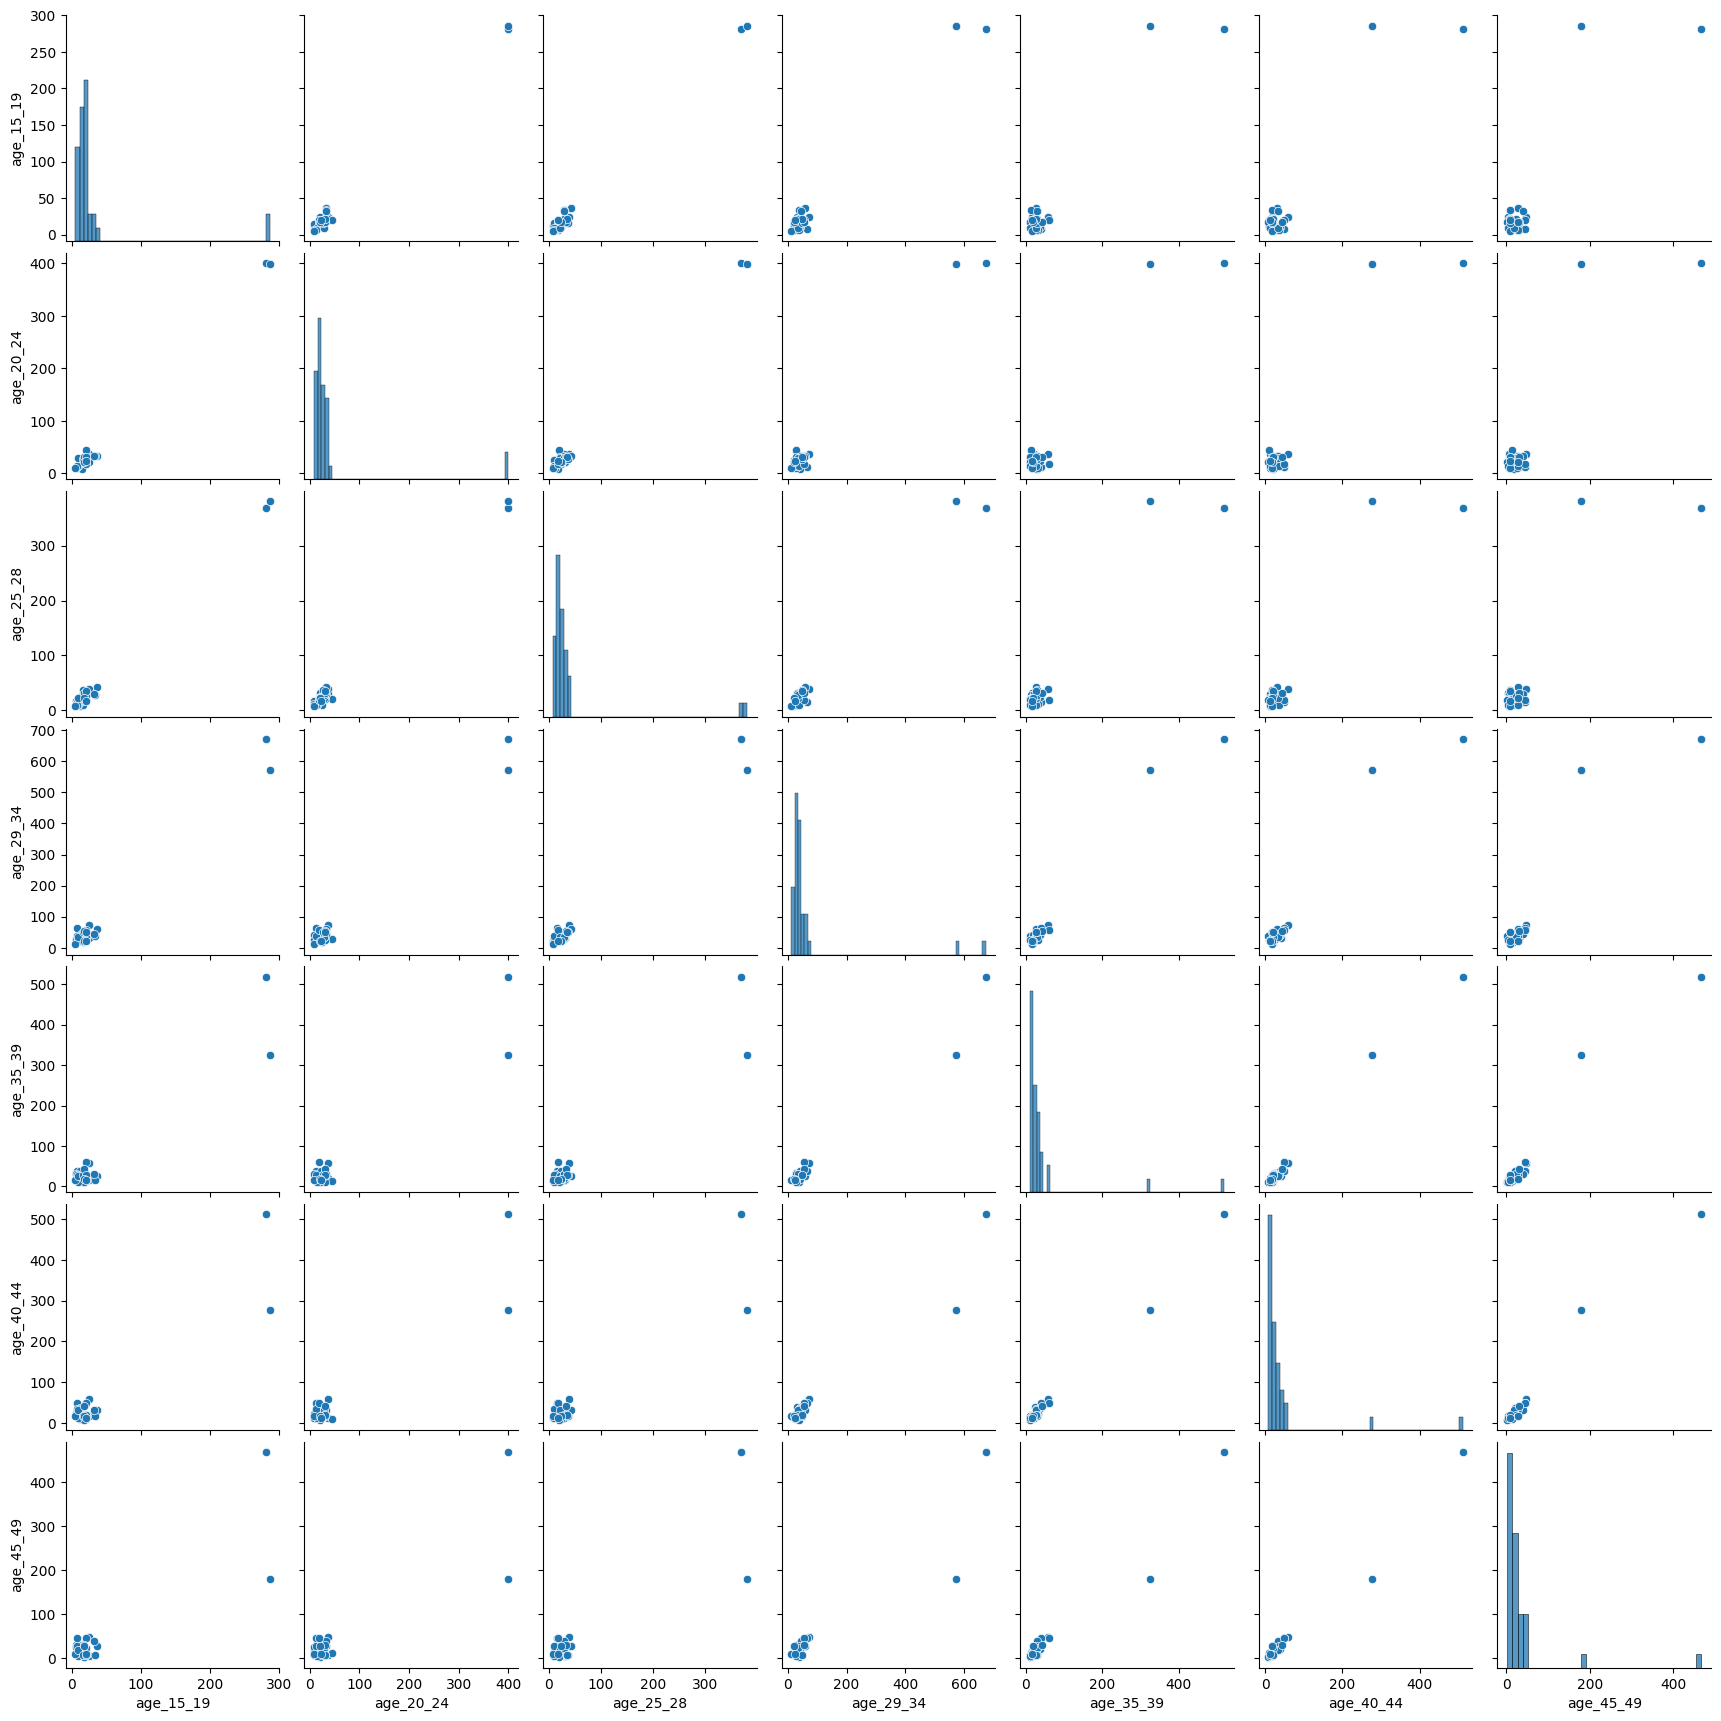

In [ ]:
#Restricting variables in the scatterplot matrix
sns.pairplot(X[['age_15_19', 'age_20_24', 'age_25_28', 'age_29_34', 'age_35_39', 'age_40_44', 'age_45_49']]);

In [ ]:
#Correlation matrix
round(con.corr(),2)

<ipython-input-8-0014acbcd5f4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(con.corr(),2)


,Всего,0-4,5-9,10-14,age_15_19,age_20_24,age_25_28,age_29_34,age_35_39,age_40_44,age_45_49,50-54,55-64,65-69,70-74,80-84,85+,14-28 вкл.,15-17 дети,сельские
Всего,1.00,0.89,0.96,0.92,0.98,0.98,0.98,0.99,0.99,0.98,0.95,0.96,0.98,0.99,0.94,0.90,0.87,0.98,0.96,0.99
0-4,0.89,1.00,0.96,0.99,0.95,0.95,0.96,0.92,0.85,0.81,0.73,0.75,0.78,0.92,0.97,0.96,0.94,0.96,0.97,0.88
5-9,0.96,0.96,1.00,0.98,0.99,0.99,0.99,0.98,0.93,0.91,0.85,0.87,0.89,0.97,0.97,0.95,0.92,0.99,0.99,0.95
10-14,0.92,0.99,0.98,1.00,0.98,0.97,0.97,0.94,0.88,0.85,0.77,0.80,0.83,0.95,0.98,0.96,0.94,0.98,0.99,0.91
age_15_19,0.98,0.95,0.99,0.98,1.00,1.00,1.00,0.99,0.95,0.93,0.88,0.90,0.92,0.98,0.97,0.94,0.92,1.00,1.00,0.97
age_20_24,0.98,0.95,0.99,0.97,1.00,1.00,1.00,0.99,0.96,0.94,0.88,0.90,0.92,0.98,0.97,0.94,0.92,1.00,0.99,0.97
age_25_28,0.98,0.96,0.99,0.97,1.00,1.00,1.00,0.99,0.96,0.93,0.88,0.90,0.92,0.98,0.97,0.95,0.93,1.00,0.99,0.96
age_29_34,0.99,0.92,0.98,0.94,0.99,0.99,0.99,1.00,0.98,0.97,0.93,0.94,0.96,0.99,0.95,0.93,0.90,0.99,0.97,0.98
age_35_39,0.99,0.85,0.93,0.88,0.95,0.96,0.96,0.98,1.00,1.00,0.97,0.98,0.99,0.98,0.90,0.87,0.83,0.96,0.93,0.98
age_40_44,0.98,0.81,0.91,0.85,0.93,0.94,0.93,0.97,1.00,1.00,0.99,0.99,1.00,0.96,0.87,0.83,0.79,0.93,0.90,0.98


In [ ]:
#Manual stepwise refinement
X1 = X.drop(columns='age_25_28', inplace=False) # age_25_28 has the highest p-value in the kitchen sink aboooove
mod1 = sm.OLS(Y, X1)
mod1_res = mod1.fit()
mod1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Всего   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2253.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           2.50e-37
Time:                        11:06:56   Log-Likelihood:                -186.43
No. Observations:                  36   AIC:                             386.9
Df Residuals:                      29   BIC:                             397.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.2045      8.963     -0.915      0.368     -26.536      10.127
age_15_19      2.6013      1.658      1.569      0.128      -0.790       5.993
age_20_24      1.5406      1.176      1.310      0.201      -0.865       3.946
age_29_34      3.2274      1.093      2.953      0.006       0.992       5.462
age_35_39     -0.7547      1.558     -0.485      0.632      -3.940       2.431
age_40_44     -0.5954      1.727     -0.345      0.733      -4.127       2.936
age_45_49      4.3699      1.286      3.399      0.002       1.740       6.999
==============================================================================
Omnibus:                       51.406   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.393
Skew:                          -3.113   Prob(JB):                     4.41e-70
Kurtosis:                      16.198   Cond. No.                         286.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Manual refinement in formula mode without age_25_29
mod1f =  smf.ols(' Всего ~ age_15_19 + age_20_24 + age_29_34 + age_35_39 + age_40_44 + age_45_49 ', data=con)
mod1f_res = mod1f.fit()
mod1f_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Всего   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2253.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           2.50e-37
Time:                        11:06:56   Log-Likelihood:                -186.43
No. Observations:                  36   AIC:                             386.9
Df Residuals:                      29   BIC:                             397.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.2045      8.963     -0.915      0.368     -26.536      10.127
age_15_19      2.6013      1.658      1.569      0.128      -0.790       5.993
age_20_24      1.5406      1.176      1.310      0.201      -0.865       3.946
age_29_34      3.2274      1.093      2.953      0.006       0.992       5.462
age_35_39     -0.7547      1.558     -0.485      0.632      -3.940       2.431
age_40_44     -0.5954      1.727     -0.345      0.733      -4.127       2.936
age_45_49      4.3699      1.286      3.399      0.002       1.740       6.999
==============================================================================
Omnibus:                       51.406   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.393
Skew:                          -3.113   Prob(JB):                     4.41e-70
Kurtosis:                      16.198   Cond. No.                         286.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<ipython-input-11-fbaee8ccaca8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mod1_res.resid, fit=stats.norm);


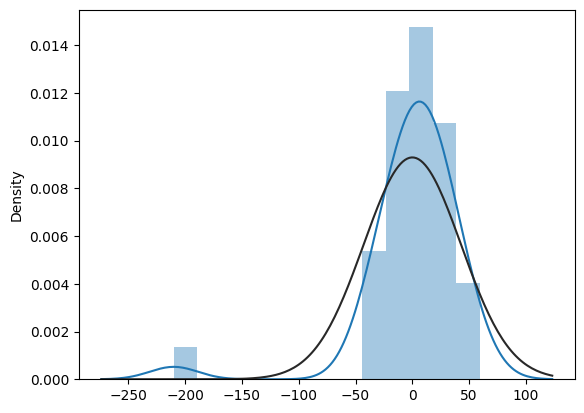

In [ ]:
#Regression diagnostics
from scipy import stats
sns.distplot(mod1_res.resid, fit=stats.norm);

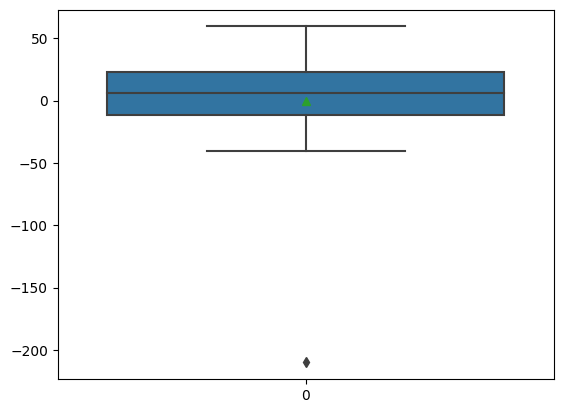

In [ ]:
sns.boxplot(mod1_res.resid, showmeans=True);

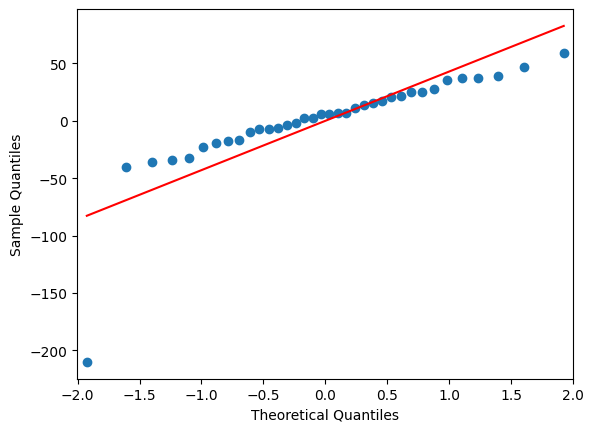

In [ ]:
sm.qqplot(mod1_res.resid, line='s');

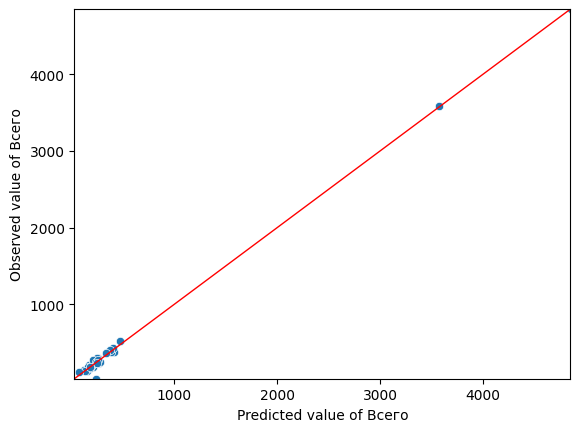

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Y_max = Y.max()
Y_min = Y.min()

ax = sns.scatterplot(x=mod1_res.fittedvalues, y=Y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of Всего")
ax.set_ylabel("Observed value of Всего")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

In [ ]:
#Creating standardized input matrices
from scipy import stats
Y_norm = pd.Series(stats.zscore(Y), name=Y.name)
Y_norm.head(3)

0   -0.243724
1   -0.345021
2   -0.236181
Name: Всего, dtype: float64

In [ ]:
X1_norm = X1.loc[:, X1.columns != "const"]
X1_norm = pd.DataFrame(stats.zscore(X1_norm))
X1_norm = sm.add_constant(X1_norm)
X1_norm.columns = X1.columns
check = pd.concat([round(X1_norm.mean(axis=0), 5), round(X1_norm.std(axis=0, ddof=0), 5)], axis=1)
check.columns=["mean", "std dev"]
check

,mean,std dev
const,1.0,0.0
age_15_19,0.0,1.0
age_20_24,0.0,1.0
age_29_34,0.0,1.0
age_35_39,0.0,1.0
age_40_44,0.0,1.0
age_45_49,0.0,1.0


In [ ]:
#Running the standardized regression
modstd = sm.OLS(Y_norm, X1_norm)
modstd_res = modstd.fit()
modstd_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Всего   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2253.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           2.50e-37
Time:                        11:06:58   Log-Likelihood:                 59.558
No. Observations:                  36   AIC:                            -105.1
Df Residuals:                      29   BIC:                            -94.03
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.163e-17      0.009  -4.85e-15      1.000      -0.018       0.018
age_15_19      0.1726      0.110      1.569      0.128      -0.052       0.398
age_20_24      0.1437      0.110      1.310      0.201      -0.081       0.368
age_29_34      0.4708      0.159      2.953      0.006       0.145       0.797
age_35_39     -0.0770      0.159     -0.485      0.632      -0.402       0.248
age_40_44     -0.0579      0.168     -0.345      0.733      -0.401       0.285
age_45_49      0.3702      0.109      3.399      0.002       0.147       0.593
==============================================================================
Omnibus:                       51.406   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.393
Skew:                          -3.113   Prob(JB):                     4.41e-70
Kurtosis:                      16.198   Cond. No.                         63.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

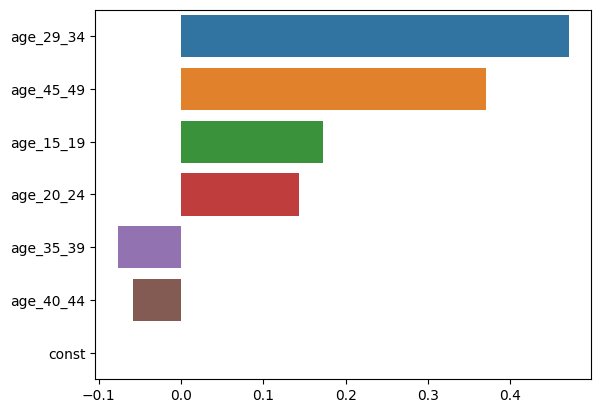

In [ ]:
#Tornado diagram
coeff = modstd_res.params
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
sns.barplot(x=coeff.values, y=coeff.index, orient='h');

In [ ]:
#Create a sklearn kitchen sink mode
X2 = X
X2.drop("const", axis=1, inplace=True)
X2.head(3)

,age_15_19,age_20_24,age_25_28,age_29_34,age_35_39,age_40_44,age_45_49
0,6,13,17,28,33,24,30
1,12,10,8,23,16,12,7
2,11,24,18,37,28,21,24


In [ ]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [ ]:
mod = LinearRegression()
mod.fit(X2,Y)

LinearRegression()

In [ ]:
coef = pd.concat([pd.Series(X2.columns), pd.Series(mod.coef_)], axis=1)
coef.columns=["variable", "coefficient"]
coef

,variable,coefficient
0,age_15_19,2.659672
1,age_20_24,1.587076
2,age_25_28,-0.149554
3,age_29_34,3.261839
4,age_35_39,-0.724903
5,age_40_44,-0.604453
6,age_45_49,4.340493


In [ ]:
#Running the refinement algorithm
sfs = SFS(mod,
         k_features='best',
         forward=False,
         floating=False,
         scoring='r2',
         cv=30)

sfs = sfs.fit(X2,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

In [ ]:
#Viewing the iterations
pd.DataFrame.from_dict(sfs.get_metric_dict(confidence_interval=0.95)).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
7,"(0, 1, 2, 3, 4, 5, 6)","[0.7103848608780791, 0.9211516797787243, 0.514...",-0.331792,"(age_15_19, age_20_24, age_25_28, age_29_34, a...",NaN,NaN,NaN
6,"(1, 2, 3, 4, 5, 6)","[0.6374835595289985, 0.048595360441153534, 0.7...",-0.005317,"(age_20_24, age_25_28, age_29_34, age_35_39, a...",NaN,NaN,NaN
5,"(1, 2, 3, 4, 5)","[0.49905703823400516, 0.9333448992605556, 0.91...",0.503499,"(age_20_24, age_25_28, age_29_34, age_35_39, a...",NaN,NaN,NaN
4,"(1, 2, 3, 5)","[0.5035991705960303, 0.8979227977175737, 0.954...",0.545356,"(age_20_24, age_25_28, age_29_34, age_40_44)",NaN,NaN,NaN
3,"(1, 3, 5)","[0.5123466911334643, 0.9060444716975672, 0.963...",0.552991,"(age_20_24, age_29_34, age_40_44)",NaN,NaN,NaN
2,"(3, 5)","[0.7445697616925127, 0.9355473920906102, 0.990...",0.493591,"(age_29_34, age_40_44)",NaN,NaN,NaN
1,"(3,)","[0.2818309768735623, 0.8093816976905286, 0.848...",-0.550444,"(age_29_34,)",NaN,NaN,NaN


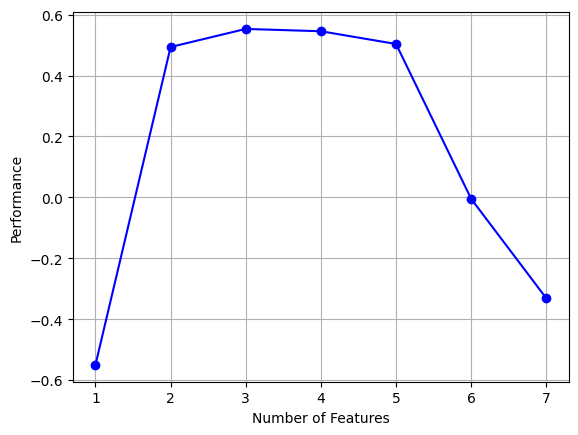

In [ ]:
#Picking the best model visually
plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.grid()
plt.show()

In [ ]:
#Viewing the best model
sfs.subsets_[7].get('feature_names')

('age_15_19',
 'age_20_24',
 'age_25_28',
 'age_29_34',
 'age_35_39',
 'age_40_44',
 'age_45_49')